In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def binary(sym, sym_len, seed = 42):

  np.random.seed(seed)
  rand_n = np.random.rand(sym)
  rand_n[np.where(rand_n >= 0.5)] = 1
  rand_n[np.where(rand_n <= 0.5)] = 0

  sig = np.zeros(int(sym*sym_len))

  id1 = np.where(rand_n == 1)

  for i in id1[0]:
    temp = int(i*sym_len)
    sig[temp:temp+sym_len] = 1
  return sig

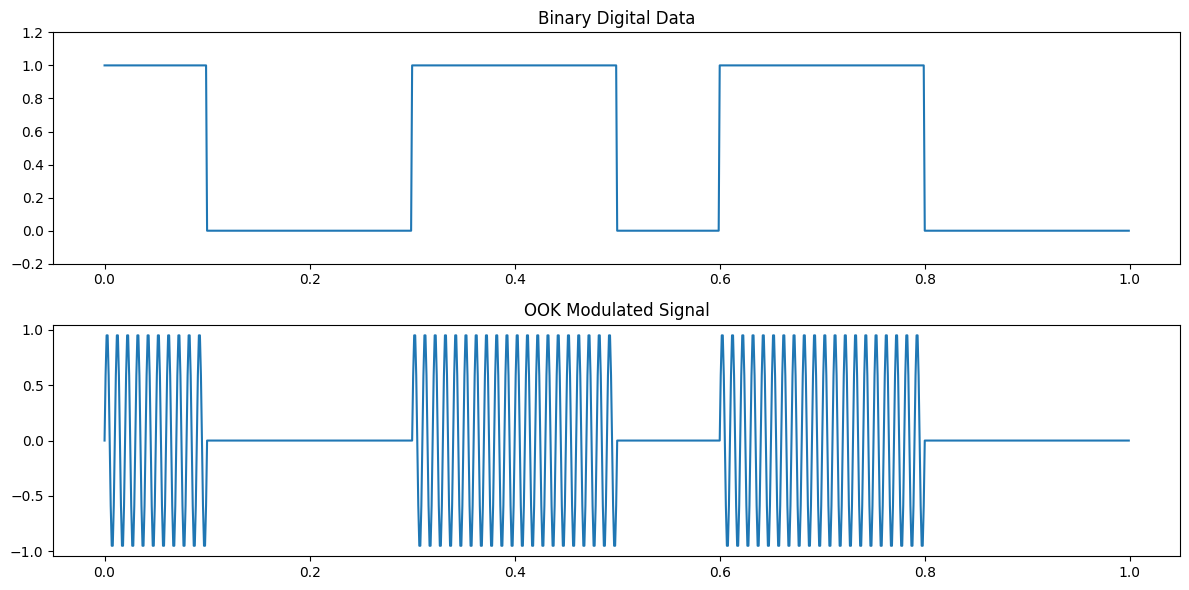

In [28]:

Fs = 1000  
fc = 100    
T = 1      
t = np.arange(0, T, 1/Fs)
x = np.sin(2 * np.pi * fc * t)  
Td = 0.1  
Nsamples = int(Td * Fs)
Nsym = int(T / Td)

sig = binary(Nsym, Nsamples, seed=123)


Xook = x * sig  # Modulate by  multiplying by the binary signal


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, sig, label="Binary Signal")
plt.title("Binary Digital Data")
plt.ylim(-0.2, 1.2)

plt.subplot(2, 1, 2)
plt.plot(t, Xook, label="OOK Modulated Signal")
plt.title("OOK Modulated Signal")
plt.tight_layout()
plt.show()

In [29]:
def ook_demodulate(modulated_signal, sampling_rate, bit_duration):
    num_samples = int(sampling_rate * bit_duration)
    num_bits = int(len(modulated_signal) / num_samples)
    demodulated = np.zeros(num_bits)
    for i in range(num_bits):
        sample = modulated_signal[i * num_samples:(i + 1) * num_samples]
        average_power = np.mean(np.abs(sample))
        demodulated[i] = 1 if average_power > 0.1 else 0
    return demodulated


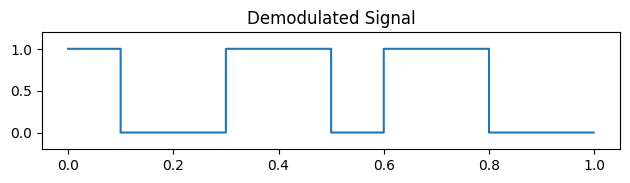

In [31]:
demodulated_data = ook_demodulate(Xook, Fs, Td)
plt.subplot(3, 1, 3)
plt.step(t[:len(demodulated_data) * Nsamples], np.repeat(demodulated_data, Nsamples), where='post', label="Demodulated Signal")
plt.title("Demodulated Signal")
plt.ylim(-0.2, 1.2)

plt.tight_layout()
plt.show()